**Importing our Dataset folder and unzipping it**

In [ ]:
from zipfile import ZipFile
file_name = "pet.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Complete')

Complete


**Importing our Libraries for the project**

In [ ]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator , load_img
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D
from keras.layers import Dense , Activation , Dropout , Flatten


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from keras.utils import to_categorical

**Setting the height and width of all the images to a constant value and assigning our input_shape**

In [227]:
img_width = 150
img_height = 150

#Assigning the path of our dataset to variables.
train_data_dir = '/content/data/train'
test_data_dir = '/content/data/test'

#Setting out input_shape for training our model 
input_shape = ( img_width , img_height , 3 )



**Writing a function convolutional_model() to train our model**

In [209]:
def convolutional_model():

      model = Sequential()

      #Building our first Conv layer.
      model.add(Conv2D(32,(5,5), input_shape = input_shape))
      model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


      #Building our second Conv Layer.
      model.add(Conv2D(64,(5,5), input_shape = input_shape))
      model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


      #Building our FullyConneced layer and applying 'Softmax' activation to our last layer.
      model.add(Flatten())
      model.add(Dense(32))
      
      model.add(Dropout(0.4))
      model.add(Activation('softmax'))

      #Compiling our model: Optimizer used: "Adam" , Loss function used: "sparse categorical cross entropy" , metrics used:'accuracy' for calculating the accuracy of our model.
      model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',  metrics=['accuracy'])
      return model

**Using the ImageDataGenerator function for the images**

In [210]:
train_data = ImageDataGenerator(
    rescale = 1./255 , 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
)

In [211]:
test_data = ImageDataGenerator(rescale = 1./255)

**Augmenting our train images into a dataset**

In [212]:
train_generator = train_data.flow_from_directory(
    train_data_dir,
    target_size = (img_width , img_height),
    class_mode = 'binary',
    batch_size = batch_size
) 

Found 40 images belonging to 2 classes.


In [213]:
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [214]:
image , labels = next(train_generator)

**Visualizing our dataset**

In [155]:
from skimage import io

def imgshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

5
1.0


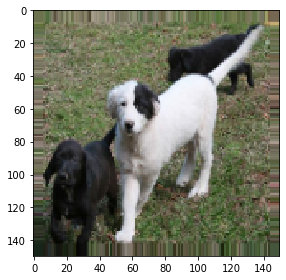

0.0


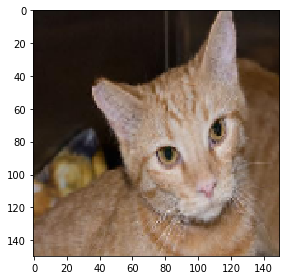

0.0


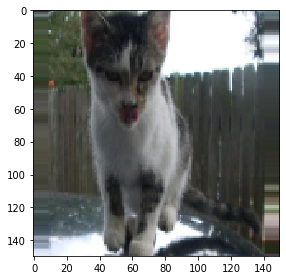

1.0


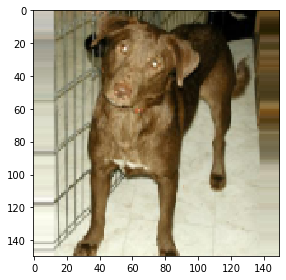

0.0


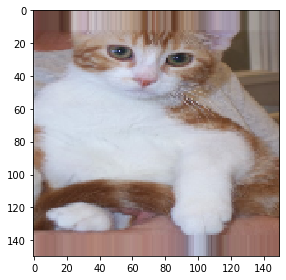

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch , label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
  image = image_batch[i]
  print(label_batch[i])
  imgshow(image)

Augmenting our test image dataset

In [215]:
test_generator = test_data.flow_from_directory(
    test_data_dir,
    target_size = (img_width , img_height),
    class_mode = 'binary',
    batch_size=batch_size
    
) 

Found 20 images belonging to 2 classes.


**Creating our model object for fitting our data**

In [216]:
model = convolutional_model()

Running **15** epochs to our model

In [224]:
# Running 15 epochs.
model.fit(train_generator, validation_data=test_generator, epochs=15, verbose=2)



scores = model.evaluate(test_generator, verbose=0)
print("Accuracy: {} percent \n Error: {} percent".format(scores[1]*100, 100-scores[1]*100))

Epoch 1/15
 - 0s - loss: 1.1910 - accuracy: 0.9000 - val_loss: 0.5290 - val_accuracy: 0.6500
Epoch 2/15
 - 0s - loss: 0.8450 - accuracy: 0.8750 - val_loss: 2.1144 - val_accuracy: 0.6000
Epoch 3/15
 - 0s - loss: 1.2502 - accuracy: 0.8750 - val_loss: 1.1110 - val_accuracy: 0.6000
Epoch 4/15
 - 0s - loss: 1.1046 - accuracy: 0.9000 - val_loss: 0.2171 - val_accuracy: 0.5500
Epoch 5/15
 - 0s - loss: 0.8828 - accuracy: 0.8500 - val_loss: 0.0528 - val_accuracy: 0.7000
Epoch 6/15
 - 0s - loss: 1.4213 - accuracy: 0.9500 - val_loss: 2.2021 - val_accuracy: 0.7000
Epoch 7/15
 - 0s - loss: 1.1511 - accuracy: 0.9250 - val_loss: 1.8849 - val_accuracy: 0.7000
Epoch 8/15
 - 1s - loss: 0.9977 - accuracy: 0.9500 - val_loss: 2.7686 - val_accuracy: 0.7000
Epoch 9/15
 - 0s - loss: 0.9469 - accuracy: 0.9750 - val_loss: 1.2183 - val_accuracy: 0.7000
Epoch 10/15
 - 0s - loss: 0.8027 - accuracy: 0.9000 - val_loss: 0.0581 - val_accuracy: 0.7000
Epoch 11/15
 - 0s - loss: 0.8483 - accuracy: 0.9500 - val_loss: 0.257

We see we get an accuracy of 75%

**Running 20 epochs to our model**

In [225]:
# Running 20 epochs.
model.fit(train_generator, validation_data=test_generator, epochs=20, verbose=2)



scores = model.evaluate(test_generator, verbose=0)
print("Accuracy: {} percent \n Error: {} percent".format(scores[1]*100, 100-scores[1]*100))

Epoch 1/20
 - 0s - loss: 0.9527 - accuracy: 0.8750 - val_loss: 2.7565 - val_accuracy: 0.7500
Epoch 2/20
 - 1s - loss: 1.4319 - accuracy: 0.8750 - val_loss: 0.7221 - val_accuracy: 0.7500
Epoch 3/20
 - 0s - loss: 0.9725 - accuracy: 0.8500 - val_loss: 2.6697 - val_accuracy: 0.7500
Epoch 4/20
 - 0s - loss: 1.1040 - accuracy: 0.8500 - val_loss: 1.9376 - val_accuracy: 0.7500
Epoch 5/20
 - 1s - loss: 0.7517 - accuracy: 0.9500 - val_loss: 1.5634 - val_accuracy: 0.7000
Epoch 6/20
 - 0s - loss: 0.9891 - accuracy: 0.9000 - val_loss: 2.9294 - val_accuracy: 0.7500
Epoch 7/20
 - 0s - loss: 0.9672 - accuracy: 0.9250 - val_loss: 0.7250 - val_accuracy: 0.7500
Epoch 8/20
 - 0s - loss: 1.2346 - accuracy: 0.9250 - val_loss: 1.9346 - val_accuracy: 0.7000
Epoch 9/20
 - 0s - loss: 0.9750 - accuracy: 0.9000 - val_loss: 0.3378 - val_accuracy: 0.7000
Epoch 10/20
 - 0s - loss: 0.9669 - accuracy: 0.8750 - val_loss: 0.1824 - val_accuracy: 0.7000
Epoch 11/20
 - 0s - loss: 0.4006 - accuracy: 0.9750 - val_loss: 4.174

We get an accuracy of 75%

Running 25 epochs to our model 

In [226]:
# Running 25 epochs
model.fit(train_generator, validation_data=test_generator, epochs=25, verbose=2)



scores = model.evaluate(test_generator, verbose=0)
print("Accuracy: {} percent \n Error: {} percent".format(scores[1]*100, 100-scores[1]*100))


Epoch 1/25
 - 1s - loss: 0.9601 - accuracy: 0.9500 - val_loss: 1.7879 - val_accuracy: 0.7500
Epoch 2/25
 - 0s - loss: 1.4657 - accuracy: 0.8500 - val_loss: 1.6454 - val_accuracy: 0.7500
Epoch 3/25
 - 0s - loss: 1.2439 - accuracy: 0.9250 - val_loss: 1.4383 - val_accuracy: 0.7500
Epoch 4/25
 - 0s - loss: 1.1342 - accuracy: 0.9750 - val_loss: 2.3727 - val_accuracy: 0.7500
Epoch 5/25
 - 0s - loss: 1.0775 - accuracy: 0.9000 - val_loss: 2.3795 - val_accuracy: 0.7500
Epoch 6/25
 - 0s - loss: 1.1024 - accuracy: 0.9500 - val_loss: 0.8371 - val_accuracy: 0.7500
Epoch 7/25
 - 0s - loss: 0.7272 - accuracy: 0.9250 - val_loss: 0.7651 - val_accuracy: 0.7500
Epoch 8/25
 - 0s - loss: 0.5805 - accuracy: 0.9000 - val_loss: 1.5476 - val_accuracy: 0.7500
Epoch 9/25
 - 0s - loss: 0.9840 - accuracy: 0.9250 - val_loss: 1.6387 - val_accuracy: 0.7500
Epoch 10/25
 - 0s - loss: 0.9594 - accuracy: 0.9250 - val_loss: 1.4964 - val_accuracy: 0.7500
Epoch 11/25
 - 0s - loss: 1.3807 - accuracy: 0.8750 - val_loss: 0.089

We get an accuracy of nearly 70%

**Summary**

I have used a very small data set:
Training data - 40 images
Test data - 20 images

I have made two Convolutional Layers for our Convolutional Network:
  -- Convolutional layer 1 with 32 filters of kernel size[5,5]
  -- Pooling layer 1 with pool size[2,2] and stride 2

  -- Convolutional layer 2 with 64 filters of kernel size[5,5] 
  -- Pooling layer 2 with pool size[2,2] and stride 2 

  --  Dense layer whose output size is fixed in the hyper parameter: fc_size=32 
  -- Dropout layer with dropout probability 0.4 
  

The model is trained for 15 20 and 25 epochs.
For 15 epochs -- Accuracy-75%.
For 20 epochs -- Accuracy-75%.
For 25 epochs -- Accuracy-69.99%.


Thus we see for such a small data we get maximum accuracy of 75% and as we increase the epochs the accuracy decreases.
